## Observations and Insights 

In [245]:
%matplotlib inline

In [246]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_research_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
mouse_research_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [247]:
# Checking the number of mice.
unique_id = mouse_research_df["Mouse ID"].unique()
unique_id
count_of_mice = len(unique_id)
count_of_mice


249

In [248]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# get total lenth
count_of_mice = len(mouse_research_df['Mouse ID'])
print(count_of_mice)

# find duplicate mouse data
duplicate_rows = mouse_research_df[mouse_research_df.duplicated()]
duplicate_rows
#remove_mouse_id = duplicate_rows['Mouse ID']
remove_mouse_id = duplicate_rows.to_dict('list')
remove_mouse_id = remove_mouse_id.get('Mouse ID')
remove_mouse_id = remove_mouse_id[0]
print(remove_mouse_id)

1893
g989


In [249]:
# Optional: Get all the data for the duplicate mouse ID. 

# Check duplicate data to verify it woked as expected.
duplicate_data = mouse_research_df.loc[mouse_research_df['Mouse ID'] == remove_mouse_id]
duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [250]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_research_clean = mouse_research_df.drop(mouse_research_df[mouse_research_df['Mouse ID'] == remove_mouse_id].index, inplace = True)
print(mouse_research_clean)


None


In [251]:
# Checking the number of mice in the clean DataFrame.
print(len(mouse_research_df['Mouse ID']))

1880


## Summary Statistics

In [252]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_vol = mouse_research_df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').mean().reset_index()
median_vol = mouse_research_df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').median().reset_index()
variance_vol = mouse_research_df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').var().reset_index()
standard_deviation_vol = mouse_research_df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').std().reset_index()
sem_vol = mouse_research_df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').sem().reset_index()


# Assemble the resulting series into a single summary dataframe.
summary_statistics = pd.merge(pd.merge(mean_vol, median_vol, how='outer', on='Drug Regimen'),variance_vol, on='Drug Regimen')
summary_statistics = summary_statistics.rename(columns={'Tumor Volume (mm3)_x': 'Mean of Tumor Volume', 'Tumor Volume (mm3)_y': 'Median of Tumor Volume', 'Tumor Volume (mm3)': 'Variance of Tumor Volume'})
summary_statistics = pd.merge(pd.merge(summary_statistics, standard_deviation_vol, how='outer', on='Drug Regimen'), sem_vol, on='Drug Regimen')
summary_statistics = summary_statistics.rename(columns={'Tumor Volume (mm3)_x': 'Std Dev of Tumor Volume', 'Tumor Volume (mm3)_y': 'SEM of Tumor Volume'})
summary_statistics


,Drug Regimen,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Std Dev of Tumor Volume,SEM of Tumor Volume
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [253]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_one_line = mouse_research_df.groupby('Drug Regimen', as_index =False).agg({'Tumor Volume (mm3)': ['mean' , 'median', 'var', 'std', 'sem']})

    
summary_one_line

Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.320930  50.446266  43.852013  6.622085  0.544332
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Number of Measurements per Drug Regimen'}, xlabel='Drug Regimen'>

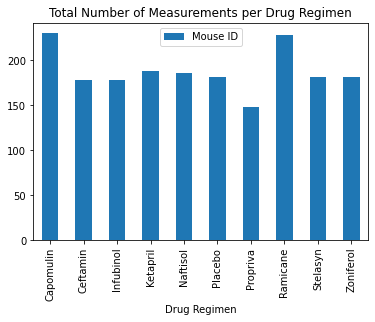

In [254]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimens = mouse_research_df.groupby('Drug Regimen')
#drug_regimens.count()
total_measurements = pd.DataFrame(drug_regimens.count()['Mouse ID']).reset_index()


total_measurements.plot(kind='bar', title='Total Number of Measurements per Drug Regimen', x = 'Drug Regimen', y = 'Mouse ID')




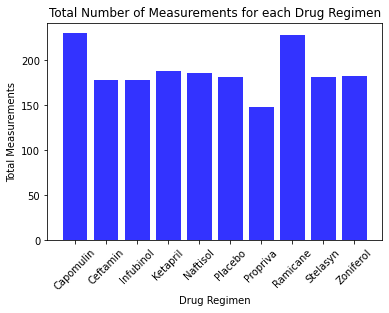

In [255]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#format this
x_values_bar = total_measurements['Drug Regimen']
y_values_bar = total_measurements['Mouse ID']

plt.bar(x_values_bar, y_values_bar, color='b', alpha=.8)
plt.xlabel('Drug Regimen')
plt.xticks(rotation = 45)
plt.ylabel('Total Measurements')
plt.title('Total Number of Measurements for each Drug Regimen')
plt.show()

<AxesSubplot:title={'center':'Gender Distribution'}, ylabel='Mouse ID'>

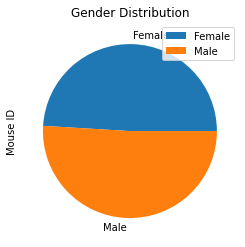

In [256]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = mouse_research_df.groupby(['Sex'])
gender_df = pd.DataFrame(gender.count()).reset_index()

gender_df.groupby(['Sex']).sum().plot(kind='pie', y = 'Mouse ID', title = 'Gender Distribution')

Text(0.5, 1.0, 'Gender Distribution')

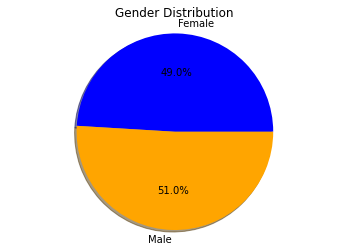

In [257]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_types = gender_df['Sex']
gender_counts = gender_df['Mouse ID']
colors = ["blue","orange"]
plt.pie(gender_counts, labels = gender_types, colors = colors, autopct = "%1.1f%%", shadow = True, startangle= 0)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Gender Distribution")


## Quartiles, Outliers and Boxplots

In [275]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_research_df.groupby('Mouse ID')
last_timepoint = pd.DataFrame(last_timepoint.max()['Timepoint']).reset_index()
last_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_research_timepoint = pd.merge(mouse_research_df, last_timepoint, on='Mouse ID')
mouse_research_timepoint = mouse_research_timepoint.rename(columns={'Timepoint_x': 'Timepoint', 'Timepoint_y': 'Last Timepoint' })
mouse_research_timepoint = mouse_research_timepoint.loc[(mouse_research_timepoint['Timepoint']==mouse_research_timepoint['Last Timepoint'])]
mouse_research_timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
1846,z314,Stelasyn,Female,21,28,5,45.934712,0,5
1849,z435,Propriva,Female,12,26,10,48.710661,0,10
1859,z581,Infubinol,Female,24,25,45,62.754451,3,45
1869,z795,Naftisol,Female,13,29,45,65.741070,3,45


In [292]:
##Need to finish this section

# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)

tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_voume_iqr = mouse_research_timepoint['Tumor Volume (mm3)']
quartiles = tumor_voume_iqr.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of the tumor volumes is: {lowerq}")
print(f"The upper quartile of the tumor volumes is: {upperq}")
print(f"The interquartile range of the tumor volumes is: {iqr}")
print(f"The the median of the tumor volumes is: {quartiles[0.5]} ")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    mouse_research_new = mouse_research_timepoint.loc[(mouse_research_timepoint['Drug Regimen'] == treatment) & (mouse_research_timepoint['Timepoint'] == mouse_research_timepoint['Last Timepoint'])]
    tumor_volume.append(mouse_research_new['Tumor Volume (mm3)'])
#print(tumor_volume)
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of the tumor volumes is: 45.87586684749999
The upper quartile of the tumor volumes is: 65.05362410500001
The interquartile range of the tumor volumes is: 19.17775725750002
The the median of the tumor volumes is: 55.793278175 
Values below 17.109230961249963 could be outliers.
Values above 93.82025999125004 could be outliers.


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [285]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = mouse_research_df.loc[(mouse_research_df['Drug Regimen'] == 'Capomulin') & (mouse_research_df['Mouse ID'] == 's185'), :]
#print(capomulin)

x_value_line = capomulin['Timepoint']
y_value_line = capomulin['Tumor Volume (mm3)']
plt.plot(x_value_line, y_value_line, marker='o', color='blue')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Timepoint vs Tumor Volume')
plt.show()


   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   
15     s185    Capomulin  Female           3          17         25   
16     s185    Capomulin  Female           3          17         30   
17     s185    Capomulin  Female           3          17         35   
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14 

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = mouse_research_df.loc[mouse_research_df['Drug Regimen'] == 'Capomulin']
capomulin_tumor_volume = capomulin.groupby('Weight (g)')

av_tumor_volume = pd.DataFrame(capomulin_tumor_volume.mean()['Tumor Volume (mm3)']).reset_index()

x_value_scatter = av_tumor_volume['Weight (g)']
y_value_scatter = av_tumor_volume['Tumor Volume (mm3)']
plt.scatter(x_value_scatter, y_value_scatter, color='blue')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume')
plt.show()



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_scatter, y_value_scatter)
regress_values = x_value_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value_scatter,y_value_scatter)
plt.plot(x_value_scatter,regress_values,"r-")
plt.annotate(line_eq, (20,38),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume')
print(f"The correlation coefficient is: {rvalue} and the r-squared value is: {rvalue**2}")
plt.show()
